
**Entrada:** Secuencia ordenada de n claves: $K=\left<k_1,k_2,...,k_n\right>$. En el que cada clave $K_i$ o "clave real" tiene una probabilidad $P_i$ de ser buscada. Existen "claves ficticas" $d_i$ que representan las búsquedas fallidas, de la forma $k_{i-1} \leq d_i \leq k_i$. Cada clave $d_i$ tiene una probabilidad $q_i$ de ser buscada.

**Salida:** Árbol binaro de búsqueda óptimo, de manera que minimice la cantidad esperada de nodos visitados (costo esperado).

# 1. Descripción del problema

Supongamos que queremos traducir un texto de Inglés a Español. Por cada palabra en Inglés que encontramos debemos buscar su traducción al Español. Para representarlo utilizamos un árbol binario de búsqueda, en el que cada nodo representa una palabra del diccionario. Al realizar una búsqueda en el árbol binario tendremos que recorrerlo hasta encontrar la palabra requerida. Pero si poseemos de antemano la frecuencia de aparición de cada palabra, podriamos construir el árbol de manera que las palabras más frecuentes aparezcan cercanas a nuestro nodo raíz y las que menos esten más lejos. Es decir, podriamos organizar nuestro árbol de búsqueda binario de manera que minimice la cantidad de nodos visitados.



# 2. Descripción del algoritmo

A continuación se analizarán dos métodos distintos para resolver el problema del árbol de busqueda óptimo. Uno utilizando recursión y otro usando programación dinámica.

Para los algoritmos utilizaremos las siguientes variables:
1. $keys$ corresponde a las claves.
2. $p$ corresponde a las probabilidades de buscar las claves.
3. $q$ corresponde a las probabilidades de buscar las claves "ficticias"
4. $i$ y $j$ se utilizan para determinar rangos.
5. $w$ corresponde a la suma de las probabilidades de las claves.
6. $n$ corresponde a la cantidad de claves.

**Recursivo:**

Para poder implemetar la función optimalBst utilizaremos una formula recursiva para poder calcular el coste esperado.

$e[i,j] = e[i,r-1] + e[r+1,j] + w(i,j)$

Esta formula proviene de que si en un árbol de búsqueda tenemos las claves $k_i...k_j$ y una de estas claves la tomamos como raíz $k_r$, asumimos que corresponde a la raíz de un subárbol óptimo. Entonces, el subárbol izquierdo de la raíz $k_r$ contiene las claves $k_i...k_{r-1}$  y el subárbol derecho con $k_{r+1}...k_j$ (ambos subárboles con sus claves ficticias). Por lo tanto, la ecuación para obtener el coste esperado de búsqueda corresponde a la suma de $e[i,r-1] + e[r+1,j]$ más la suma de las probabilidades de sus claves.   

si lo modificamos para la implementación nos quedaría:

$coste = optimalBst(keys,p,q,i,k-1) + optimalBst(keys,p,q,k+1,j) + w$

Entonces, primero declaramos un caso base, en el que si $j == i - 1$ nos retorna $q[i-1]$. Es decir, el caso de que no obtengamos ninguna clave, por lo tanto, solo habrá una clave ficticia. Luego vamos calculando el coste esperado utilizando la formula anteriormente dada, después vamos comparando el coste actual con el costeMinimo. En caso de que el coste actual sea menor al costeMinimo este se actualiza. Finalmente retornamos el coste Mínimo obtenido.


**Programación Dinámica:**

El inconveniente que tenemos con el método anterior, es que resolvemos varias veces el mismo problema, aumentado el tiempo de ejecución del algoritmo. Sin embargo, debido a eso podemos hacer uso del método de programación dinámica, en el que vamos guardando los resultados obtenidos para no resolverlos nuevamente.

Primero definimos una subestructura óptima. si consideramos que $C_i,_j$ corresponde al coste del árbol mínimo para la secuencia ordenada de claves $k_i,k_{i+1},…,k_j$, podemos calcular el coste mínimo de $C_i,_n$ en base al coste mínimo de una serie de subproblemas.

Para calcular cada subproblema básicamente consiste en tomar una clave $k_i$ como nuestra raíz, entonces obtenemos el coste mínimo de sus subproblemas que se forman.

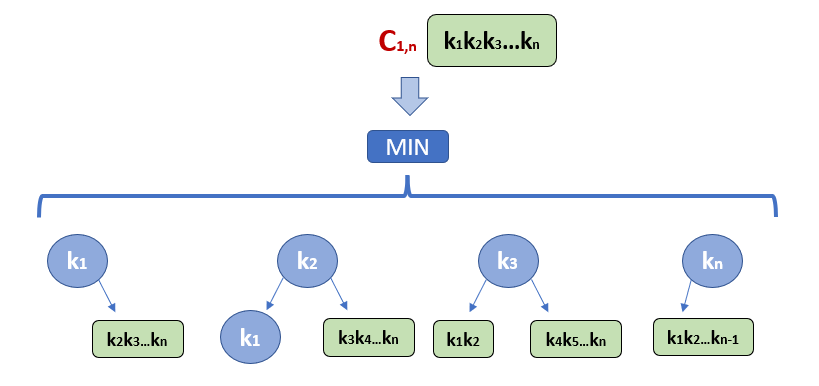

Para implementar lo anteriormente dicho, haremos una función que reciba las claves, su cantidad y sus probabilidades de ser buscadas. Luego declararemos una matriz para los resultados o los costes mínimos obtenidos, otra matriz para guardar las sumas de probabilidades de las claves, y otra matriz para las raíces. Inicializamos las diagonales de las matrices "costes" y "raices". Entonces en un ciclo for declaramos $L$, que recorre desde 1 hasta n+1, luego usamos otro ciclo for $i$ que recorrerá las filas de las matrices. Luego calculamos el valor de $j$ para las colummnas junto con la suma de las probabilidades de las claves. Después en otro ciclo for vamos obteniendo los distintos valores para la raíz, obteniendo sus costes y los agregamos a la matriz de costes mínimos y la raíz utilizada en la matriz de raíces. Finalemente retornamos el valor que se encuentra en la esquina superior derecha de la matriz de costes, que corresponderá al coste mínimo esperado.


# 3. Código

## 3.1 Optimal BST recursivo

In [723]:
#Librerias
import random
import numpy as np
from ast import Return
import networkx as nx
import matplotlib.pyplot as plt
import sys
from termcolor import colored, cprint
from networkx.drawing.nx_pydot import graphviz_layout


def sumarProb(p,q,i,j,verbose):
  if verbose == True:
    cprint("\nCalcular probabilidades...",'cyan',attrs=['bold'])

  sum = 0
  #Obtener suma de probabilidades de las claves reales
  for k in range(i,j+1):
    sum += p[k]
  #Obtener suma de probabilidades de las claves ficticias  
  for k in range(i-1,j+1):
    sum += q[k]

  if verbose == True:
    cprint(f"Suma de probabiliades: {sum}",'cyan',attrs=['bold'])
  #Retorna suma de probabilidades
  return sum

#OptimalBST recursivo
def optimalBst(keys,p,q,i,j,verbose):
  global countRecursiones
  countRecursiones += 1
  if verbose == True and countRecursiones > 0:
    print("\n---------------------------------------------------")
    cprint("<<<<","red",attrs=['bold'],end='')
    cprint(f"Recursion n°{countRecursiones}","red",attrs=['bold'],end='')
    cprint(">>>>","red",attrs=['bold'])

  #Caso base (No hay claves reales, por tanto, solo hay una clave ficticia)
  if j == i-1:
    if verbose == True:
      cprint(f" Caso base. Retorna {q[i-1]}","red",attrs=['bold'])
      print("---------------------------------------------------")
    return q[i-1]

  #Declarar un valor genérico para costeMin
  costeMin = 99999999

  for k in range(i,j+1):
    if verbose == True:
      cprint(f"\nRaiz: {k} --- Rango de claves {i}-{j}","blue",attrs=['bold'])
    #Obtener coste mediante la formula mostrada anteriormente
    w = sumarProb(p,q,i,j,verbose)
    coste = optimalBst(keys,p,q,i,k-1,verbose) + optimalBst(keys,p,q,k+1,j,verbose) + w

    #Asignar costeMinimo
    if coste < costeMin:
      costeMin = coste
      
  if verbose == True:
    cprint(f"Coste Minimo calculado: {costeMin}","green",attrs=['bold'])
  #Retornar CosteMinimo
  return costeMin

#Ejemplo
keys = [0,1,2,3,4,5]
p = [0,0.15,0.10,0.05,0.10,0.20]
q = [0.05,0.10,0.05,0.05,0.05,0.10]

print("keys:",keys)
print("claves reales (p):",p)
print("claves ficticias (q):",q)
countRecursiones = -1
i = 1
j = len(keys)-1
min = optimalBst(keys,p,q,i,j,verbose = False)
cprint(f"\ncoste Mínimo: {min}","cyan",attrs=['bold'])
cprint(f"cantidad recursiones: {countRecursiones}","cyan",attrs=['bold'])


keys: [0, 1, 2, 3, 4, 5]
claves reales (p): [0, 0.15, 0.1, 0.05, 0.1, 0.2]
claves ficticias (q): [0.05, 0.1, 0.05, 0.05, 0.05, 0.1]

coste Mínimo: 2.75
cantidad recursiones: 242


### 3.1.1 verbose == `True`

In [463]:
print("keys:",keys)
print("claves reales (p):",p)
print("claves ficticias (q):",q)
countRecursiones = -1
i = 1
j = len(keys)-1
min = optimalBst(keys,p,q,i,j,verbose = True)
cprint(f"\ncoste Mínimo: {min}","cyan",attrs=['bold'])
cprint(f"cantidad recursiones: {countRecursiones}","cyan",attrs=['bold'])

keys: [0, 1, 2, 3, 4, 5]
claves reales (p): [0, 0.15, 0.1, 0.05, 0.1, 0.2]
claves ficticias (q): [0.05, 0.1, 0.05, 0.05, 0.05, 0.1]

Raiz: 1 --- Rango de claves 1-5

Calcular probabilidades...
Suma de probabiliades: 1.0000000000000002

---------------------------------------------------
<<<<Recursion n°1>>>>
 Caso base. Retorna 0.05
---------------------------------------------------

---------------------------------------------------
<<<<Recursion n°2>>>>

Raiz: 2 --- Rango de claves 2-5

Calcular probabilidades...
Suma de probabiliades: 0.8000000000000002

---------------------------------------------------
<<<<Recursion n°3>>>>
 Caso base. Retorna 0.1
---------------------------------------------------

---------------------------------------------------
<<<<Recursion n°4>>>>

Raiz: 3 --- Rango de claves 3-5

Calcular probabilidades...
Suma de probabiliades: 0.6

---------------------------------------------------
<<<<Recursion n°5>>>>
 Caso base. Retorna 0.05
---------------------

## 3.2 Optimal BST (Programación dinámica)

In [527]:
def dynamicalOptimalBst(keys,p,q,i,n,verbose):
  global subProblemas
  #Crear matriz para costes mínimos
  costes = [[0 for x in range(n)]
          for y in range(n+1)]
  #Crear matriz para suma de probabilidades
  w = [[0 for x in range(n)]
          for y in range(n+1)]
  #Crear matriz para raíces
  raices = [[0 for x in range(n)]
          for y in range(n+1)]

  #LLenar las matrices "costes" y "w"
  for i in range(1,n+1):
    costes[i][i-1] = q[i-1]
    w[i][i-1] = q[i-1]
  
  for L in range(1,n+1):
    #Valor de i para las filas
    for i in range(1,n - L + 2):
      #Obtener valor de j para las columnas
      j = i + L - 1

      #evitar error
      if i >= n or j >= n: break

      #declarar valor genérico para costes
      costes[i][j] = 9999999
      
      #calcular suma de probabilidades
      w[i][j] = w[i][j-1] + p[j] + q[j]
      # if verbose == True:
      #   cprint(f"Suma probabilidades: {w[i][j]}","cyan",attrs=['bold'])

      for k in range(i,j+1):
        subProblemas += 1
        if verbose == True:
          cprint("\n<<<<","red",attrs=['bold'],end='')
          cprint(f"subProblema n°{subProblemas}","red",attrs=['bold'],end='')
          cprint(">>>>","red",attrs=['bold'])
        #calcular coste
        coste = costes[i][k-1] + costes[k+1][j] + w[i][j]
        if verbose == True:
          cprint(f"coste calculado: {coste}","green",attrs=['bold'])
          cprint(f"raíz: {k}","green",attrs=['bold'])
        #asignar coste y raiz a sus matrices respectivas
        if coste < costes[i][j]:
          costes[i][j] = coste
          raices[i][j] = k 

  
  #retornar coste mínimo y raíz
  return costes[1][n-1],raices[1][n-1],subProblemas

#Caso ficticio
keys = [0,1,2,3,4,5]
p = [0,0.15,0.10,0.05,0.10,0.20]
q = [0.05,0.10,0.05,0.05,0.05,0.10]
print("keys:",keys)
print("claves reales (p):",p)
print("claves ficticias (q):",q)
subProblemas = 0
i = 1
n = len(keys)
costoMinimo,raiz,subProblemas = dynamicalOptimalBst(keys,p,q,i,n,verbose = False)
cprint(f"costo mínimo: {costoMinimo}","cyan",attrs=['bold'])
cprint(f"número de subproblemas: {subProblemas}","cyan",attrs=['bold'])
cprint(f"raiz a utilizar: {raiz}","cyan",attrs=['bold'])

keys: [0, 1, 2, 3, 4, 5]
claves reales (p): [0, 0.15, 0.1, 0.05, 0.1, 0.2]
claves ficticias (q): [0.05, 0.1, 0.05, 0.05, 0.05, 0.1]
costo mínimo: 2.75
número de subproblemas: 35
raiz a utilizar: 2


### 3.2.1 verbose == `True`

In [494]:
#Ejemplo
keys = [0,1,2,3,4,5]
p = [0,0.15,0.10,0.05,0.10,0.20]
q = [0.05,0.10,0.05,0.05,0.05,0.10]
subProblemas = 0
i = 1
n = len(keys)
costoMinimo,raiz,subProblemas = dynamicalOptimalBst(keys,p,q,i,n,verbose = True)
cprint(f"costo mínimo: {costoMinimo}","cyan",attrs=['bold'])
cprint(f"número de subproblemas: {subProblemas}","cyan",attrs=['bold'])
cprint(f"raiz a utilizar: {raiz}","cyan",attrs=['bold'])


<<<<subProblema n°1>>>>
coste calculado: 0.45000000000000007
raíz: 1

<<<<subProblema n°2>>>>
coste calculado: 0.4
raíz: 2

<<<<subProblema n°3>>>>
coste calculado: 0.25
raíz: 3

<<<<subProblema n°4>>>>
coste calculado: 0.30000000000000004
raíz: 4

<<<<subProblema n°5>>>>
coste calculado: 0.5
raíz: 5

<<<<subProblema n°6>>>>
coste calculado: 0.9
raíz: 1

<<<<subProblema n°7>>>>
coste calculado: 0.9500000000000002
raíz: 2

<<<<subProblema n°8>>>>
coste calculado: 0.7
raíz: 2

<<<<subProblema n°9>>>>
coste calculado: 0.8
raíz: 3

<<<<subProblema n°10>>>>
coste calculado: 0.65
raíz: 3

<<<<subProblema n°11>>>>
coste calculado: 0.6
raíz: 4

<<<<subProblema n°12>>>>
coste calculado: 1.05
raíz: 4

<<<<subProblema n°13>>>>
coste calculado: 0.9
raíz: 5

<<<<subProblema n°14>>>>
coste calculado: 1.3
raíz: 1

<<<<subProblema n°15>>>>
coste calculado: 1.25
raíz: 2

<<<<subProblema n°16>>>>
coste calculado: 1.5
raíz: 3

<<<<subProblema n°17>>>>
coste calculado: 1.2
raíz: 2

<<<<subProblema n°18>>

# 4. Correctitud

---
##4.1 Correctitud para la subestructura óptima

$Teorema:$ *La subestructura óptima permite minimizar los costos que tendrá un árbol a través de subproblemas.*

Sea un costo $C^*$ el costo del árbol con raíces $k_x$ de un arreglo $K$, podemos calcular el costo mínimo considerando el cálculo de sus subproblemas:


* $C^*$<sub>1,n</sub> = $Min(CombinacionesDeUnArreglo([k_1,k_2,...,k_n]))$

$<$$C^*$<sub>1,n</sub>$>$ corresponde al mínimo valor obtenido para una serie de combinaciones donde se considera a cada elemento $k_i$ una raíz de un árbol binario de búsqueda óptimo. Teniendo en cuenta este elemento como raíz de un árbol podemos considerar un arreglo izquierdo y derecho a este, donde podemos calcular los costos para cada uno de ellos aplicando la misma estrategia anterior.


---

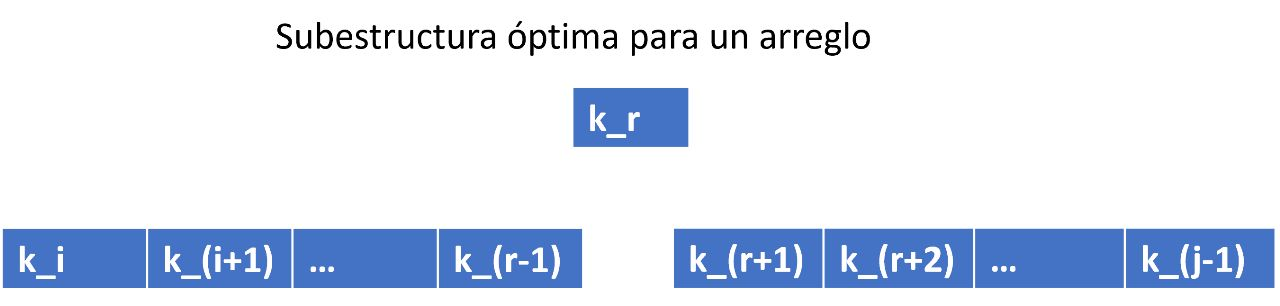


Gracias a esto, podemos calcular el costo midiendo el problema en subproblemas para cualquier árbol o sub-árbol y cuando se llegue a un caso base de único elemento empezar a calcular el valor mínimo para una combinación posible del árbol principal.

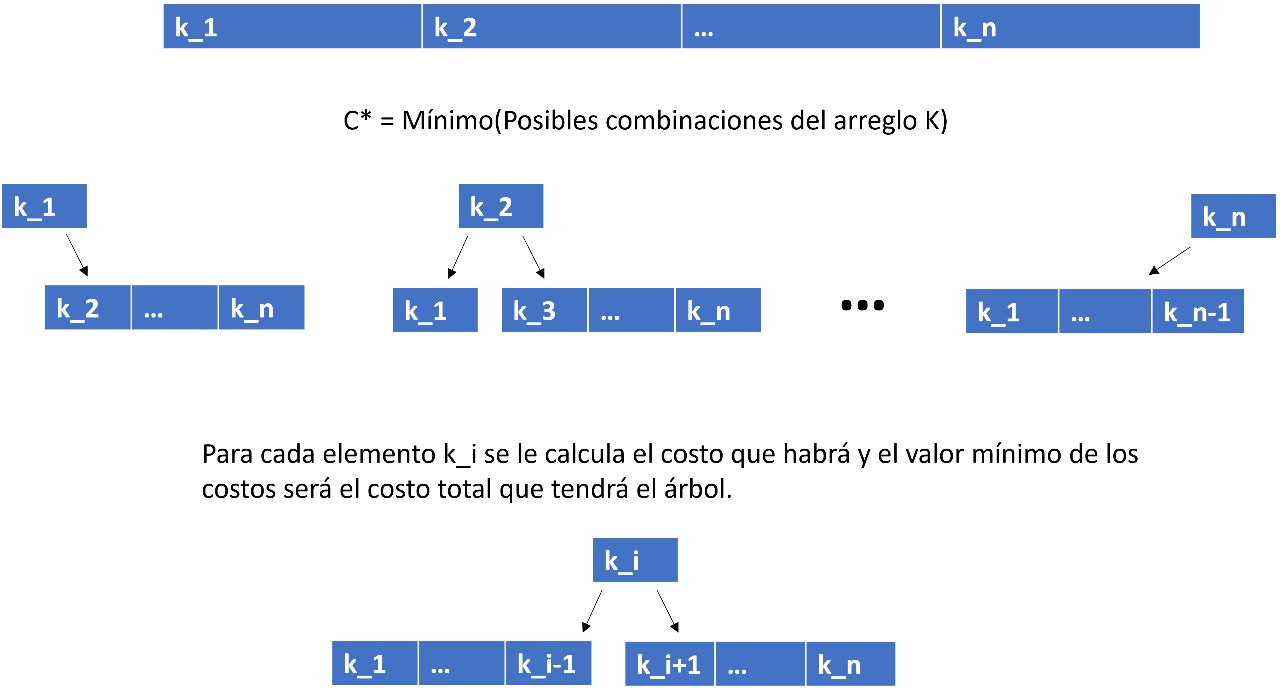

Sabiendo lo anterior, podemos decir que va a llegar un punto que el problema tendrá un caso base, donde es un único elemento del arreglo. Estos corresponden a las probabilidades ficticias que son las hojas de todos los árboles, al volver a armar el árbol iremos calculando los sub-árboles más pequeños y luego los más grandes a partir de los ya resueltos. Según lo anterior, podemos calcular el mínimo de cada árbol formado por una clave $k_i$.

---


##4.2 Función de recurrencia del valor óptimo

Dados tres arreglos, uno de claves $(keys)$, probabilidades de keys $(p)$ y probabilidades ficticias $(q)$, podemos definir una función de recurrencia en base al punto anterior (3.1).

Dado una clave $k_r$ perteneciente $[i...j]$ podemos obtener dos estructuras auxiliares:

* Arreglo $A_1$ que va tiene contiene los elementos desde $[i...r-1]$

* Arreglo $A_2$ que va tiene contiene los elementos desde $[r+1...j]$

Dado lo anterior, para cada uno de estos arreglos se puede obtener una un coste mínimo. Este proceso se puede repetir múltiples veces hasta obtener el caso base donde llegamos a las claves ficticias. Por tanto, podemos definir la siguiente función de recurrencia.


* $C$<sub>(i,j)</sub> = $min$<sub>(i $\leq$ k $\leq$ j)</sub> {C<sub>(i,k-1)</sub> + C<sub>(k+1,j)</sub>} $+$ $\displaystyle\sum_{r=i}^{j} p_r$ $+$ $\displaystyle\sum_{r=i-1}^{j} q_r$ $////$ Si y solo si $i < j$


* $C$<sub>(i,j)</sub> = q[i] $////$ Si y solo si $i = j$

Donde C<sub>(i,k-1)</sub> corresponde al costo del arreglo $A_1$ y C<sub>(k+1,j)</sub> corresponde a $A_2$, donde serian el sub-árbol izquierdo y derecho respectivamente.

---

# 5. Tiempo de ejecución

# 6. Experimentos

A continuación se realizarán dos experimentos, en el primero se comparará los tiempos de ejecución de ambos algoritmos dependiendo del tamaño del problema. En el segundo se analizará el tiempo de ejecución 

## 6.1 optimalBST vs dynamicalOptimalBST

Para el experimento se utilizará la función **optimal_bst_instance_generator**, que se encarga de generar instancias para las claves y sus probabilidades. Estableceremos un tamaño del problema de $n \in [1,13]$. Los valores generados para las claves son entre 1 y 100

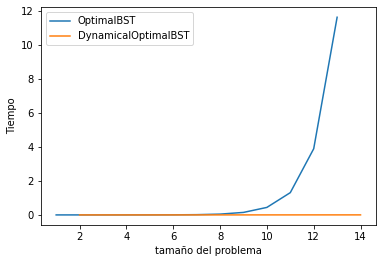

In [699]:
from matplotlib import cm
import matplotlib.pyplot as plt
import datetime
from timeit import repeat

def optimal_bst_instance_generator(n):
    keys = sorted(random.sample(range(1, 100), n))
    arr = np.random.random(n*2+1)
    arr /= arr.sum()
    
    p = list(arr[:n]) # Probabilidad de las claves
    q = list(arr[n:]) # Probabilidad de las claves ficticias
    return keys, p, q

x=[]; y=[]
ix=[]; iy=[]
for n in range(1,14):
  verbose = False
  keys, p, q = optimal_bst_instance_generator(n)
  keys.insert(0,0)
  p.insert(0,0)
  i = 1
  j = len(keys) - 1
  z = repeat(setup="from __main__ import optimalBst", stmt=f"optimalBst({keys},{p},{q},{i},{j},{verbose})", repeat=1, number=10)
  x.append(n)
  y.append(z)

  i = 1
  n = len(keys)
  l = repeat(setup="from __main__ import dynamicalOptimalBst", stmt=f"dynamicalOptimalBst({keys},{p},{q},{i},{n},{verbose})", repeat=1, number=10)  
  ix.append(n)
  iy.append(l)

plt.plot(x,y)
plt.plot(ix,iy)
plt.legend(["OptimalBST","DynamicalOptimalBST"])

plt.xlabel('tamaño del problema')
plt.ylabel('Tiempo')
plt.show()

Como se puede observar, el algoritmo **DynamicalOptimalBST** es mucho más eficiente que **OptimalBST**, esto hace sentido debido a la complejidad temporal que poseen los algoritmos. Recordemos que el algoritmo recursivo posee una una complejidad de $O(2^n)$, mientras que el algoritmo que hace uso de programación dinámica posee complejidad $O(n^2)$. Con esto podemos saber inmediatamente que el método recursivo es muy malo si se trabaja con una cantidad de claves superior a 15.

## 6.2 OptimalBST con la raíz de mayor probabilidad

Para el experimento se modificará la función **OptimalBST** para 

In [727]:
def sumar(p,q,i,j):
  sum = 0
  for k in range(i,j+1):
    sum += p[k]
  for k in range(i-1,j+1):
    sum += q[k]

  return sum

def optimalBstConRaizMasProbable(keys,p,q,i,j,l):
  global countRecursiones
  countRecursiones += 1
  if j == i - 1:
    return q[i-1]

  global empieza
  empieza += 1
  if empieza == 0:
    k = l

  costeMin = 99999999
  if empieza == 0:
    print(l)
    s = sumar(p,q,i,j)
    coste = optimalBstConRaizMasProbable(keys,p,q,i,k-1,l) + optimalBstConRaizMasProbable(keys,p,q,k+1,j,l) + s
    if coste < costeMin:
      costeMin = coste
  else:
    for k in range(i,j+1):
      s = sumar(p,q,i,j)
      coste = optimalBstConRaizMasProbable(keys,p,q,i,k-1,l) + optimalBstConRaizMasProbable(keys,p,q,k+1,j,l) + s

      if coste < costeMin:
        costeMin = coste

  return costeMin

keys = [0,1,2,3,4,5]
p = [0,0.15,0.10,0.05,0.10,0.20]
q = [0.05,0.10,0.05,0.05,0.05,0.10]

print("keys:",keys)
print("claves reales (p):",p)
print("claves ficticias (q):",q)
countRecursiones = -1

i = 1
j = len(keys) - 1
k = (p.index(max(p)))
empieza = -1
recursiones = -1
min = optimalBstConRaizMasProbable(keys,p,q,i,j,k)
cprint(f"\ncoste encontrado: {min}","cyan",attrs=['bold'])
cprint(f"cantidad recursiones: {countRecursiones}","cyan",attrs=['bold'])



keys: [0, 1, 2, 3, 4, 5]
claves reales (p): [0, 0.15, 0.1, 0.05, 0.1, 0.2]
claves ficticias (q): [0.05, 0.1, 0.05, 0.05, 0.05, 0.1]
5

coste encontrado: 2.8500000000000005
cantidad recursiones: 82


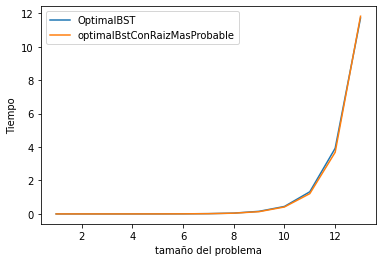

In [728]:
from matplotlib import cm
import matplotlib.pyplot as plt
import datetime
from timeit import repeat

def optimal_bst_instance_generator(n):
    keys = sorted(random.sample(range(1, 100), n))
    arr = np.random.random(n*2+1)
    arr /= arr.sum()
    
    p = list(arr[:n]) # Probabilidad de las claves
    q = list(arr[n:]) # Probabilidad de las claves ficticias
    return keys, p, q

x=[]; y=[]
ix=[]; iy=[]
for n in range(1,14):
  verbose = False
  keys, p, q = optimal_bst_instance_generator(n)
  keys.insert(0,0)
  p.insert(0,0)
  i = 1
  j = len(keys) - 1
  z = repeat(setup="from __main__ import optimalBst", stmt=f"optimalBst({keys},{p},{q},{i},{j},{verbose})", repeat=1, number=10)
  x.append(n)
  y.append(z)

  i = 1
  j = len(keys) - 1
  k = (p.index(max(p)))
  l = repeat(setup="from __main__ import optimalBstConRaizMasProbable", stmt=f"optimalBstConRaizMasProbable({keys},{p},{q},{i},{j},{k})", repeat=1, number=10)  
  ix.append(n)
  iy.append(l)

plt.plot(x,y)
plt.plot(ix,iy)
plt.legend(["OptimalBST","optimalBstConRaizMasProbable"])

plt.xlabel('tamaño del problema')
plt.ylabel('Tiempo')
plt.show()